# Identification of Key Genes in DEX stimulation
Goals: <br>
+ identify key genes for further analysis 
+ group genes into different catagories 
+ make list for undergrads to look into
+ do it for two datasets

Explore A1-2 dataset <br>
+ Have time series data for both bulk and single cell





Explore U2OS dataset: <br>
+ S4u => basically the hourly rate of change



In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# A1-2 Single Cell

In [43]:
adata_a12 = sc.read_text('/home/formanj/scRNAseq_model/UpDownProject/Datasets/DUSP1/A1-2_sc_Bulk_GSE141834/GSE141834_scRNAseq_rawCounts.txt').T

In [44]:
adata_a12.obs_names

Index(['Dex.00.2_AGGTTATCGCCTATATAC', 'Dex.00.2_CTATTACTATTAGTCCTA',
       'Dex.00.2_CAAGTCATCCGGGGACGA', 'Dex.00.2_ACCTTCTAATAGTGCTAA',
       'Dex.00.2_TCGCCTAAAGAACATAGA', 'Dex.00.2_GAGGCCACAAGGACAAGG',
       'Dex.00.2_GGATTGCTGTGGGCTTGT', 'Dex.00.2_CGTTATCTGTGGCTGTGG',
       'Dex.00.2_TCGGGAAGTAAACAAGTC', 'Dex.00.2_GTACAGGGTAGGGAGGCC',
       ...
       'Dex.18.2_GCTCCCACGGACTAGAGG', 'Dex.18.2_TGGCAGAAAGAATACCGA',
       'Dex.18.2_TTAAGATCGGGAGTCGGC', 'Dex.18.2_CCGATGAGATGTTGAATT',
       'Dex.18.2_TCGCCTTCTAGCCGAAAG', 'Dex.18.2_TGCGGTAGGTTAACGGAC',
       'Dex.18.2_TGAGACCTGTGGTCATCA', 'Dex.18.2_TAGAGGGGCCATAGGTTA',
       'Dex.18.2_TCGGGACACCACCAGGAG', 'Dex.18.2_CTATTAGCCGTTGTCGGC'],
      dtype='object', length=2400)

In [45]:
adata_a12.obs['Timepoint'] = [x.split('.')[1] for x in adata_a12.obs_names]
adata_a12.obs['Treatment'] = [x.split('.')[0] for x in adata_a12.obs_names]

adata_a12.obs['Timepoint'] = adata_a12.obs['Timepoint'].astype('category')
adata_a12.obs['Treatment'] = adata_a12.obs['Treatment'].astype('category')

In [46]:
adata_a12_dex = adata_a12[adata_a12.obs['Treatment'] == 'Dex']

In [47]:
adata_a12_dex.uns['Timepoints'] = set(adata_a12_dex.obs['Timepoint'])
adata_a12_dex.uns['Timepoints'] = list(adata_a12_dex.uns['Timepoints'])
adata_a12_dex.uns['Timepoints'].sort()

adata_a12_dex.uns['avg_DUSP1'] = []
adata_a12_dex.uns['var_DUSP1'] = []
for timepoint in adata_a12_dex.uns['Timepoints']:
    adata_a12_dex.uns['avg_DUSP1'].append(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint].X.mean())
    adata_a12_dex.uns['var_DUSP1'].append(np.std(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint].X))





/tmp/ipykernel_434327/3806597239.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_a12_dex.uns['Timepoints'] = set(adata_a12_dex.obs['Timepoint'])


In [48]:
adata_a12_dex.uns['Timepoints']

['00', '01', '02', '04', '08', '18']

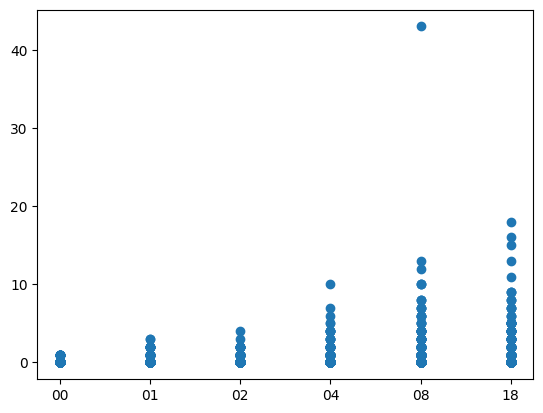

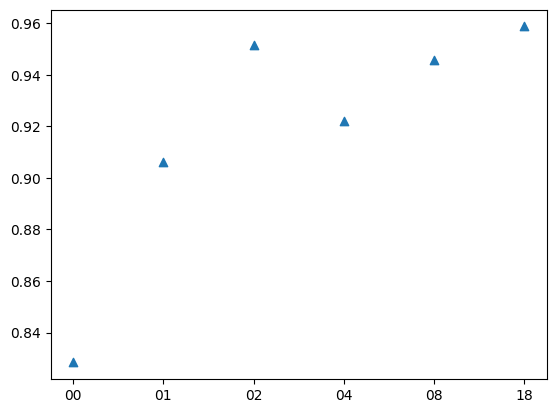

In [49]:
plt.scatter(adata_a12_dex.obs['Timepoint'], adata_a12_dex[:, 'DUSP1'].X)
plt.show()

plt.scatter(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], linestyle='None', marker='^')
#plt.errorbar(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], adata_a12_dex.uns['var_DUSP1'], linestyle='None', marker='^')
plt.show()